<a href="https://colab.research.google.com/github/pratikshaa12/DL-dt/blob/main/Handwritten_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
y_test.shape

(10000,)

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

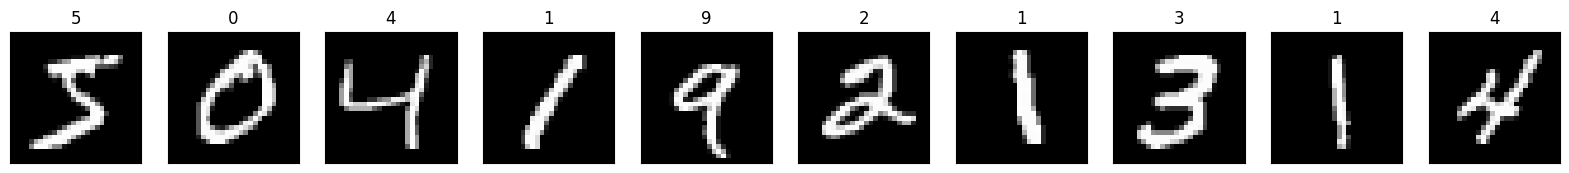

In [6]:
fig, axes= plt.subplots(ncols=10, sharex=False,
                        sharey=True, figsize=(20,4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(X_train[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()


In [7]:
y_train=to_categorical(y_train)
y_test= to_categorical(y_test)


In [9]:
y_train.shape

(60000, 10)

In [11]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,965 (31.11 KB)

 Trainable params: 7,965 (31.11 KB)

 Non-trainable params: 0 (0.00 B)

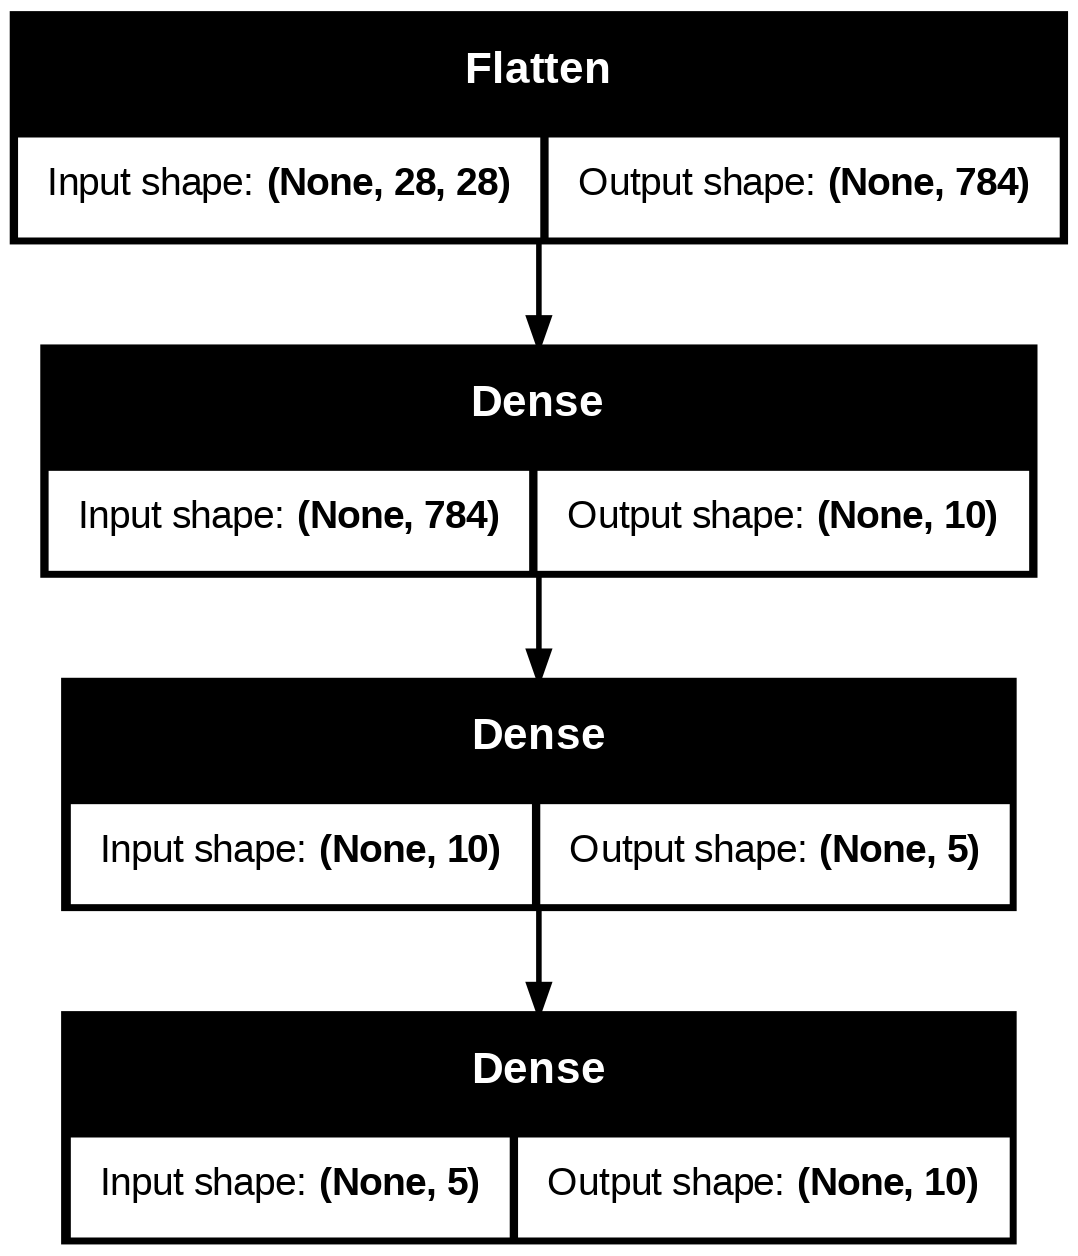

In [13]:
utils.plot_model(model, show_shapes=True)

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [18]:
history= model.fit(X_train, y_train, epochs=20,
          validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8470 - loss: 0.5366 - val_acc: 0.8632 - val_loss: 0.5075
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8532 - loss: 0.5302 - val_acc: 0.8567 - val_loss: 0.5130
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - acc: 0.8551 - loss: 0.5166 - val_acc: 0.8647 - val_loss: 0.4949
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8483 - loss: 0.5173 - val_acc: 0.8269 - val_loss: 0.5487
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8481 - loss: 0.5202 - val_acc: 0.8591 - val_loss: 0.5128
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8468 - loss: 0.5326 - val_acc: 0.8543 - val_loss: 0.5164
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - acc: 0.8522 - loss: 0.5119 - val_acc: 0.8572 - val_loss: 0.5098
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8574 - loss: 0.5078 - val_acc: 0.8382 - val_loss: 0.5555
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [19]:
history.history

{'acc': [0.8499500155448914,
  0.854449987411499,
  0.854283332824707,
  0.8377500176429749,
  0.852150022983551,
  0.8507500290870667,
  0.8488166928291321,
  0.8542166948318481,
  0.8535500168800354,
  0.8581833243370056,
  0.8572999835014343,
  0.8618000149726868,
  0.8479833602905273,
  0.8623999953269958,
  0.8643500208854675,
  0.8659666776657104,
  0.8624666929244995,
  0.8610166907310486,
  0.8630833625793457,
  0.8683000206947327],
 'loss': [0.5334116816520691,
  0.5222184658050537,
  0.5165615677833557,
  0.5384808778762817,
  0.5171924233436584,
  0.5220469236373901,
  0.5226694941520691,
  0.519355833530426,
  0.5109902620315552,
  0.4968620240688324,
  0.4992615282535553,
  0.4928084909915924,
  0.5237604975700378,
  0.4851537048816681,
  0.48690804839134216,
  0.4796862006187439,
  0.48373186588287354,
  0.4850740134716034,
  0.4782581329345703,
  0.470913290977478],
 'val_acc': [0.8632000088691711,
  0.8567000031471252,
  0.8647000193595886,
  0.8269000053405762,
  0.859

In [21]:
model.save('mnist_model.h5')

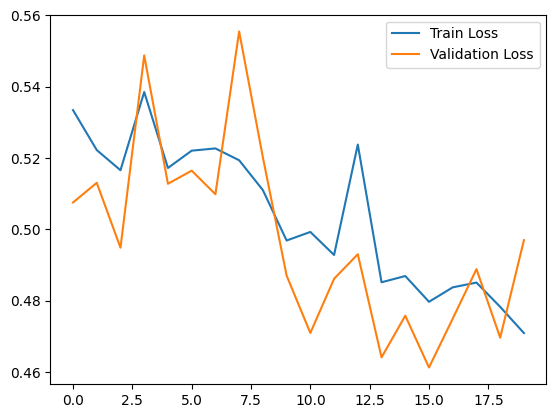

In [24]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

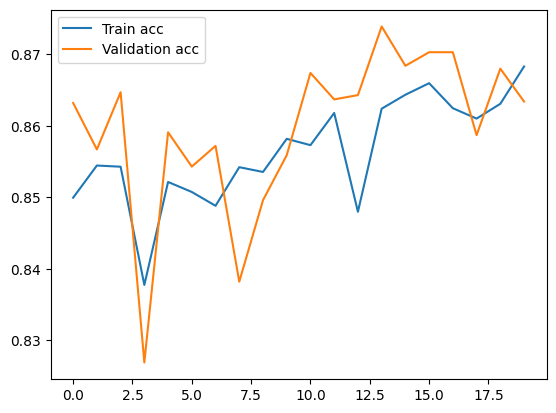

In [25]:
plt.plot(history.history['acc'], label='Train acc')
plt.plot(history.history['val_acc'], label='Validation acc')
plt.legend()

In [29]:
import keras


In [30]:
from tensorflow import keras


In [31]:
model=keras.models.load_model('mnist_model.h5')

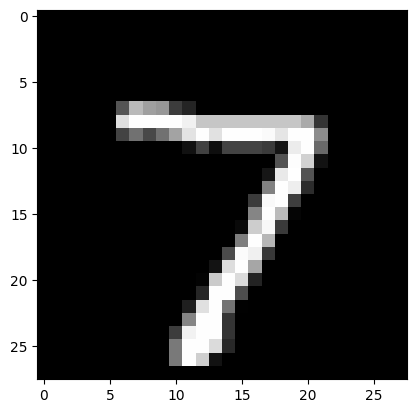

In [32]:

plt.imshow(X_test[0], cmap='gray')

In [34]:
X_test[0].shape

(28, 28)

In [35]:
import numpy as np

In [36]:
x= np.reshape(X_test[0], (1,28,28))
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


7

In [37]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[1.4901512e-03, 3.3063003e-05, 1.7671690e-03, 1.1493180e-02,
        7.7964078e-06, 1.0559818e-04, 1.5309785e-06, 9.5127463e-01,
        3.9276111e-04, 3.3434164e-02]], dtype=float32)